# Smart Home Energy Prediction using KNN
This notebook demonstrates how to use the K-Nearest Neighbors (KNN) algorithm to predict energy consumption in a smart home environment.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('smart_home_energy_regression.csv')
data.head()

DateTime  Temperature   Humidity       Light         CO2  \
0  2023-01-01 00:00:00    18.745401  41.107976  335.535115  803.621797   
1  2023-01-01 01:00:00    24.507143  62.514057  322.280919  878.008838   
2  2023-01-01 02:00:00    22.319939  82.376750  915.629122  550.280739   
3  2023-01-01 03:00:00    20.986585  73.933493  324.591580  774.924460   
4  2023-01-01 04:00:00    16.560186  78.393669  344.754754  743.047590   

   HumidityRatio  EnergyConsumption  
0       0.003716         223.287124  
1       0.004416         275.253686  
2       0.004280         288.303278  
3       0.002462         254.785484  
4       0.002448         209.451944

In [4]:
# Feature selection and preprocessing
X = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y = data['EnergyConsumption']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 9.053775815813244
Mean Absolute Error: 7.047086963403458


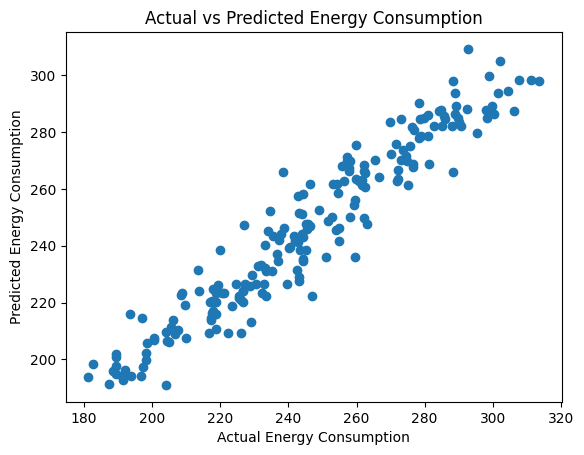

In [8]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

In [9]:
# Perform k-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validated RMSE: {cv_rmse_scores.mean()}')

Cross-Validated RMSE: 31.299783829480344
